In [1]:
import pandas as pd
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import scale

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df=pd.read_csv("Inc_Exp_Data.csv")
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income
0,5000,8000,3,2000,64200
1,6000,7000,2,3000,79920
2,10000,4500,2,0,112800
3,10000,2000,1,0,97200
4,12500,12000,2,3000,147000


## Calculating mean, median and mode for Monthly Household Expenses

In [3]:
print(st.mean(df.Mthly_HH_Expense))
print(st.median(df.Mthly_HH_Expense))
print(st.mode(df.Mthly_HH_Expense))

18818
15500.0
25000


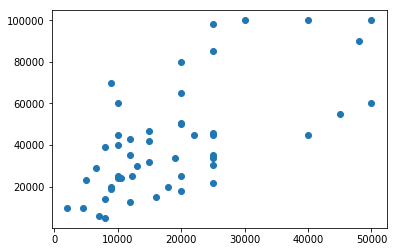

In [4]:
plt.scatter(df.Mthly_HH_Expense,df.Mthly_HH_Income)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['Mthly_HH_Expense'],axis=1),df[['Mthly_HH_Expense']],test_size=0.3, random_state=1) 

In [13]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
pred=reg.predict(X_test)
pred

array([[16807.5721464 ],
       [26547.58772744],
       [29803.30433885],
       [29535.36516099],
       [ 5388.62171959],
       [ 2595.62416112],
       [35515.68317067],
       [17390.86767739],
       [30877.61663729],
       [24598.11155244],
       [12545.846268  ],
       [17903.21146118],
       [15252.1173971 ],
       [18751.89058302],
       [14863.25370977]])

## Calculation of Mean Squared Error

In [15]:
mse=np.mean((y_test-pred)**2)
mse

Mthly_HH_Expense    9.417015e+07
dtype: float64

In [16]:
print('mse = '+str(sklearn.metrics.mean_squared_error(y_test,pred)))
print('rmse = '+str(sklearn.metrics.mean_squared_error(y_test,pred)**0.5))

mse = 94170150.44041623
rmse = 9704.130586529442


In [17]:
model1=sm.OLS(y_train,X_train)
result=model1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     133.0
Date:                Sat, 23 Feb 2019   Prob (F-statistic):           3.81e-18
Time:                        12:16:24   Log-Likelihood:                -350.95
No. Observations:                  35   AIC:                             707.9
Df Residuals:                      32   BIC:                             712.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Mthly_HH_Income       0.1909      0.043      4.477      0.000       0.104       0.278
No_of_Fly_Members  2369.6210    486.245      4.873      0.000    1379.173    3360.069
Emi_or_Rent_Amt       0.3310      0.153      2.162      0.038       0.019       0.643
==============================================================================
Omnibus:                        1.481   Durbin-Watson:                   2.247
Prob(Omnibus):                  0.477   Jarque-Bera (JB):                1.033
Skew:                           0.420   Prob(JB):                        0.597
Kurtosis:                       2.958   Cond. No.                     2.34e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Checking Multicollinearity


In [18]:
X = df.drop(labels='Mthly_HH_Expense',axis=1)


In [19]:
X.head()

,Mthly_HH_Income,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income
0,5000,3,2000,64200
1,6000,2,3000,79920
2,10000,2,0,112800
3,10000,1,0,97200
4,12500,2,3000,147000


In [20]:
X.values

array([[   5000,       3,    2000,   64200],
       [   6000,       2,    3000,   79920],
       [  10000,       2,       0,  112800],
       [  10000,       1,       0,   97200],
       [  12500,       2,    3000,  147000],
       [  14000,       2,       0,  196560],
       [  15000,       3,   35000,  167400],
       [  18000,       5,    8000,  216000],
       [  19000,       2,       0,  218880],
       [  20000,       4,       0,  220800],
       [  20000,       4,    8000,  278400],
       [  22000,       6,   12000,  279840],
       [  23400,       3,       0,  292032],
       [  24000,       6,       0,  316800],
       [  24000,       4,       0,  244800],
       [  25000,       3,       0,  246000],
       [  25000,       3,    3500,  261000],
       [  25000,       6,       0,  258000],
       [  29000,       2,    2000,  348000],
       [  30000,       4,       0,  385200],
       [  30500,       5,    5000,  351360],
       [  32000,       4,       0,  445440],
       [  

In [21]:
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

Mthly_HH_Income      63.551537
No_of_Fly_Members     4.608252
Emi_or_Rent_Amt       1.267737
Annual_HH_Income     59.087789
dtype: float64

## After dropping the Multicollinear Variable

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['Mthly_HH_Expense','Annual_HH_Income'],axis=1),df[['Mthly_HH_Expense']],test_size=0.3, random_state=1) 

In [24]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
pred=reg.predict(X_test)

## Calculation of Mean Squared Error

In [26]:
mse=np.mean((y_test-pred)**2)
mse

Mthly_HH_Expense    9.417015e+07
dtype: float64

In [27]:
print('mse = '+str(sklearn.metrics.mean_squared_error(y_test,pred)))
print('rmse = '+str(sklearn.metrics.mean_squared_error(y_test,pred)**0.5))

mse = 94170150.44041623
rmse = 9704.130586529442


In [28]:
model1=sm.OLS(y_train,X_train)
result=model1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     133.0
Date:                Sat, 23 Feb 2019   Prob (F-statistic):           3.81e-18
Time:                        12:34:18   Log-Likelihood:                -350.95
No. Observations:                  35   AIC:                             707.9
Df Residuals:                      32   BIC:                             712.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Mthly_HH_Income       0.1909      0.043      4.477      0.000       0.104       0.278
No_of_Fly_Members  2369.6210    486.245      4.873      0.000    1379.173    3360.069
Emi_or_Rent_Amt       0.3310      0.153      2.162      0.038       0.019       0.643
==============================================================================
Omnibus:                        1.481   Durbin-Watson:                   2.247
Prob(Omnibus):                  0.477   Jarque-Bera (JB):                1.033
Skew:                           0.420   Prob(JB):                        0.597
Kurtosis:                       2.958   Cond. No.                     2.34e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
df=pd.read_csv("Inc_Exp_Data.csv")
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income
0,5000,8000,3,2000,64200
1,6000,7000,2,3000,79920
2,10000,4500,2,0,112800
3,10000,2000,1,0,97200
4,12500,12000,2,3000,147000


In [30]:
df.Mthly_HH_Income=scale(df.Mthly_HH_Income)
df.Emi_or_Rent_Amt=scale(df.Emi_or_Rent_Amt)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [32]:
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income
0,-1.415024,8000,3,-0.171557,64200
1,-1.376317,7000,2,-0.009711,79920
2,-1.221492,4500,2,-0.495249,112800
3,-1.221492,2000,1,-0.495249,97200
4,-1.124727,12000,2,-0.009711,147000


In [33]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['Mthly_HH_Expense','Annual_HH_Income'],axis=1),df[['Mthly_HH_Expense']],test_size=0.3, random_state=1) 

In [34]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
pred=reg.predict(X_test)

## Calculation of Mean Squared Error

In [36]:
mse=np.mean((y_test-pred)**2)
mse

Mthly_HH_Expense    9.417015e+07
dtype: float64

In [37]:
print('mse = '+str(sklearn.metrics.mean_squared_error(y_test,pred)))
print('rmse = '+str(sklearn.metrics.mean_squared_error(y_test,pred)**0.5))

mse = 94170150.44040608
rmse = 9704.130586528918


In [38]:
model1=sm.OLS(y_train,X_train)
result=model1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     116.6
Date:                Sat, 23 Feb 2019   Prob (F-statistic):           2.63e-17
Time:                        12:42:46   Log-Likelihood:                -353.06
No. Observations:                  35   AIC:                             712.1
Df Residuals:                      32   BIC:                             716.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Mthly_HH_Income    3895.5513   1038.608      3.751      0.001    1779.975    6011.127
No_of_Fly_Members  4348.8401    240.571     18.077      0.000    3858.812    4838.868
Emi_or_Rent_Amt    2016.0172   1019.482      1.977      0.057     -60.599    4092.634
==============================================================================
Omnibus:                        0.226   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.893   Jarque-Bera (JB):                0.030
Skew:                          -0.070   Prob(JB):                        0.985
Kurtosis:                       2.966   Cond. No.                         4.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""